In [1]:
# challenge kaggle House Prices
# dataset : descriptions des maisons et le but est de prédire le prix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
df_train = pd.read_csv("train.csv", index_col = 0)
df_test = pd.read_csv("test.csv", index_col = 0)

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# je remarque déjà que train a 80 colonnes et test, 79 ce qui est logique puisqu'il ne contient pas la variable cible

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [8]:
# je n'ai presque que des NaN pour Alley, FireplaceQu, PoolQC, Fence, et MiscFeature 
# je supprime ces 5 colonnes de train et de test
df_train = df_train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)
df_test = df_test.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)
# il manque quelques valeurs à d'autres colonnes de train et comme ça concerne beaucoup de colonnes mais peu de lignes, je supprime
# juste les lignes avec des NaN 
df_train = df_train.dropna()
df_test = df_test.dropna()

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

In [9]:
df_test.info()

# on a toujours une colonne de moins que train donc OK

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 1461 to 2919
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1108 non-null   int64  
 1   MSZoning       1108 non-null   object 
 2   LotFrontage    1108 non-null   float64
 3   LotArea        1108 non-null   int64  
 4   Street         1108 non-null   object 
 5   LotShape       1108 non-null   object 
 6   LandContour    1108 non-null   object 
 7   Utilities      1108 non-null   object 
 8   LotConfig      1108 non-null   object 
 9   LandSlope      1108 non-null   object 
 10  Neighborhood   1108 non-null   object 
 11  Condition1     1108 non-null   object 
 12  Condition2     1108 non-null   object 
 13  BldgType       1108 non-null   object 
 14  HouseStyle     1108 non-null   object 
 15  OverallQual    1108 non-null   int64  
 16  OverallCond    1108 non-null   int64  
 17  YearBuilt      1108 non-null   int64  
 18  YearR

<AxesSubplot:>

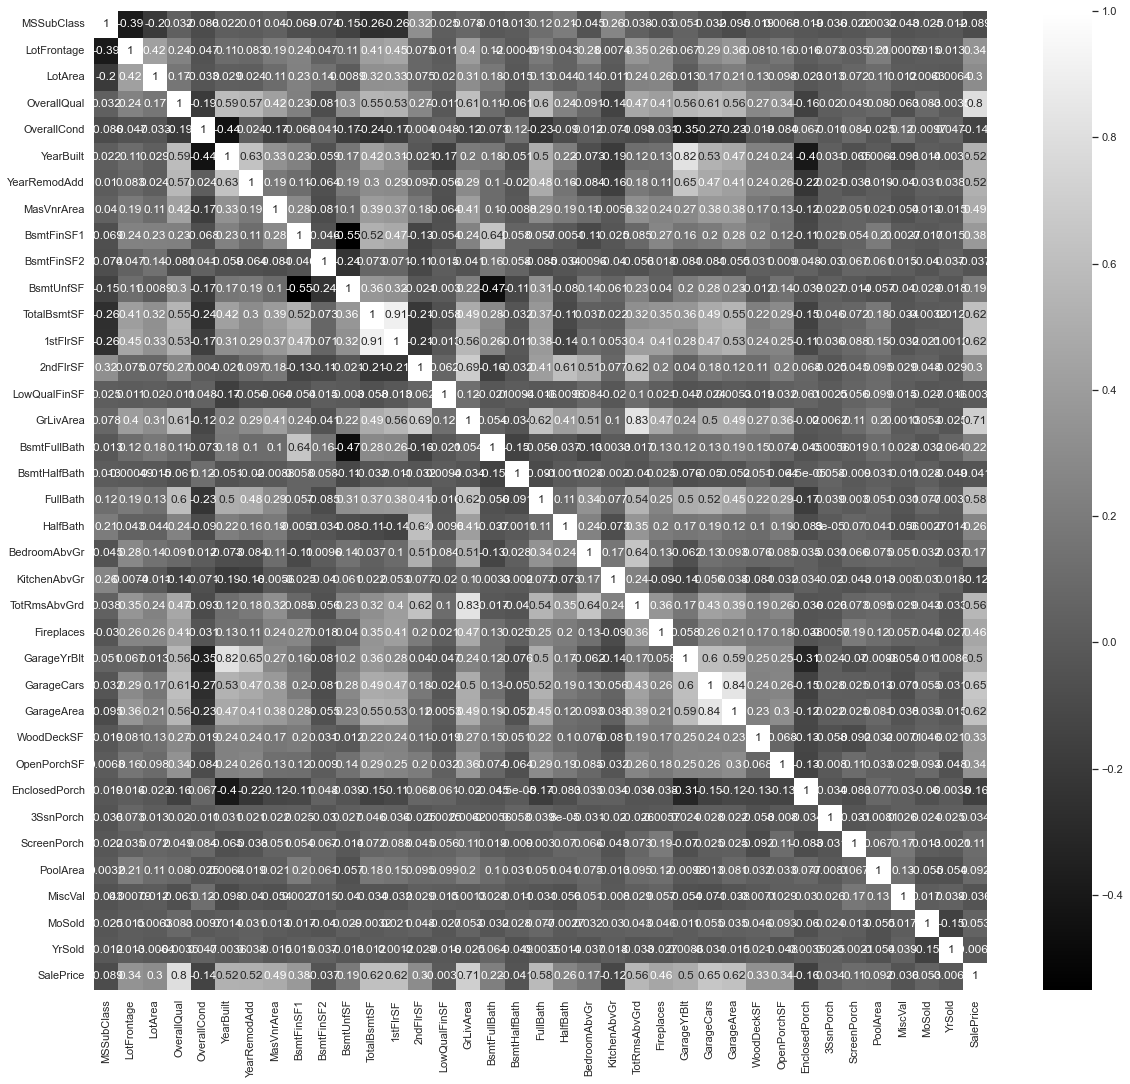

In [10]:
# nous avons beaucoup de variables catégorielles
# je veux déjà voir si elles ont toutes une corrélation avec le prix
df_train_corr = df_train.corr()
plt.figure(figsize = (20,18))
sns.heatmap(df_train_corr, cmap = "gray", annot = True)
# je ne regarde que la dernière ligne SalePrice
# j'enlèverai ensuite les variables qui n'ont presqu'aucun lien avec Sale Price, soit celles dans l'intervalle ]-0.1;0.1[

In [11]:
# je supprime ces colonnes de df_train et df_test
df_train = df_train.drop(["MSSubClass", "OverallCond", "LowQualFinSF", "BsmtHalfBath", "BsmtFinSF2", "KitchenAbvGr", "3SsnPorch", "PoolArea", "MiscVal", "YrSold"], axis = 1)
df_test = df_test.drop(["MSSubClass", "OverallCond", "LowQualFinSF", "BsmtHalfBath", "BsmtFinSF2", "KitchenAbvGr", "3SsnPorch", "PoolArea", "MiscVal", "YrSold"], axis = 1)


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 1 to 1460
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1094 non-null   object 
 1   LotFrontage    1094 non-null   float64
 2   LotArea        1094 non-null   int64  
 3   Street         1094 non-null   object 
 4   LotShape       1094 non-null   object 
 5   LandContour    1094 non-null   object 
 6   Utilities      1094 non-null   object 
 7   LotConfig      1094 non-null   object 
 8   LandSlope      1094 non-null   object 
 9   Neighborhood   1094 non-null   object 
 10  Condition1     1094 non-null   object 
 11  Condition2     1094 non-null   object 
 12  BldgType       1094 non-null   object 
 13  HouseStyle     1094 non-null   object 
 14  OverallQual    1094 non-null   int64  
 15  YearBuilt      1094 non-null   int64  
 16  YearRemodAdd   1094 non-null   int64  
 17  RoofStyle      1094 non-null   object 
 18  RoofMatl

In [13]:
df_test.info()
# OK toujours une colonne en moins que train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 1461 to 2919
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1108 non-null   object 
 1   LotFrontage    1108 non-null   float64
 2   LotArea        1108 non-null   int64  
 3   Street         1108 non-null   object 
 4   LotShape       1108 non-null   object 
 5   LandContour    1108 non-null   object 
 6   Utilities      1108 non-null   object 
 7   LotConfig      1108 non-null   object 
 8   LandSlope      1108 non-null   object 
 9   Neighborhood   1108 non-null   object 
 10  Condition1     1108 non-null   object 
 11  Condition2     1108 non-null   object 
 12  BldgType       1108 non-null   object 
 13  HouseStyle     1108 non-null   object 
 14  OverallQual    1108 non-null   int64  
 15  YearBuilt      1108 non-null   int64  
 16  YearRemodAdd   1108 non-null   int64  
 17  RoofStyle      1108 non-null   object 
 18  RoofM

Text(0, 0.5, 'prix')

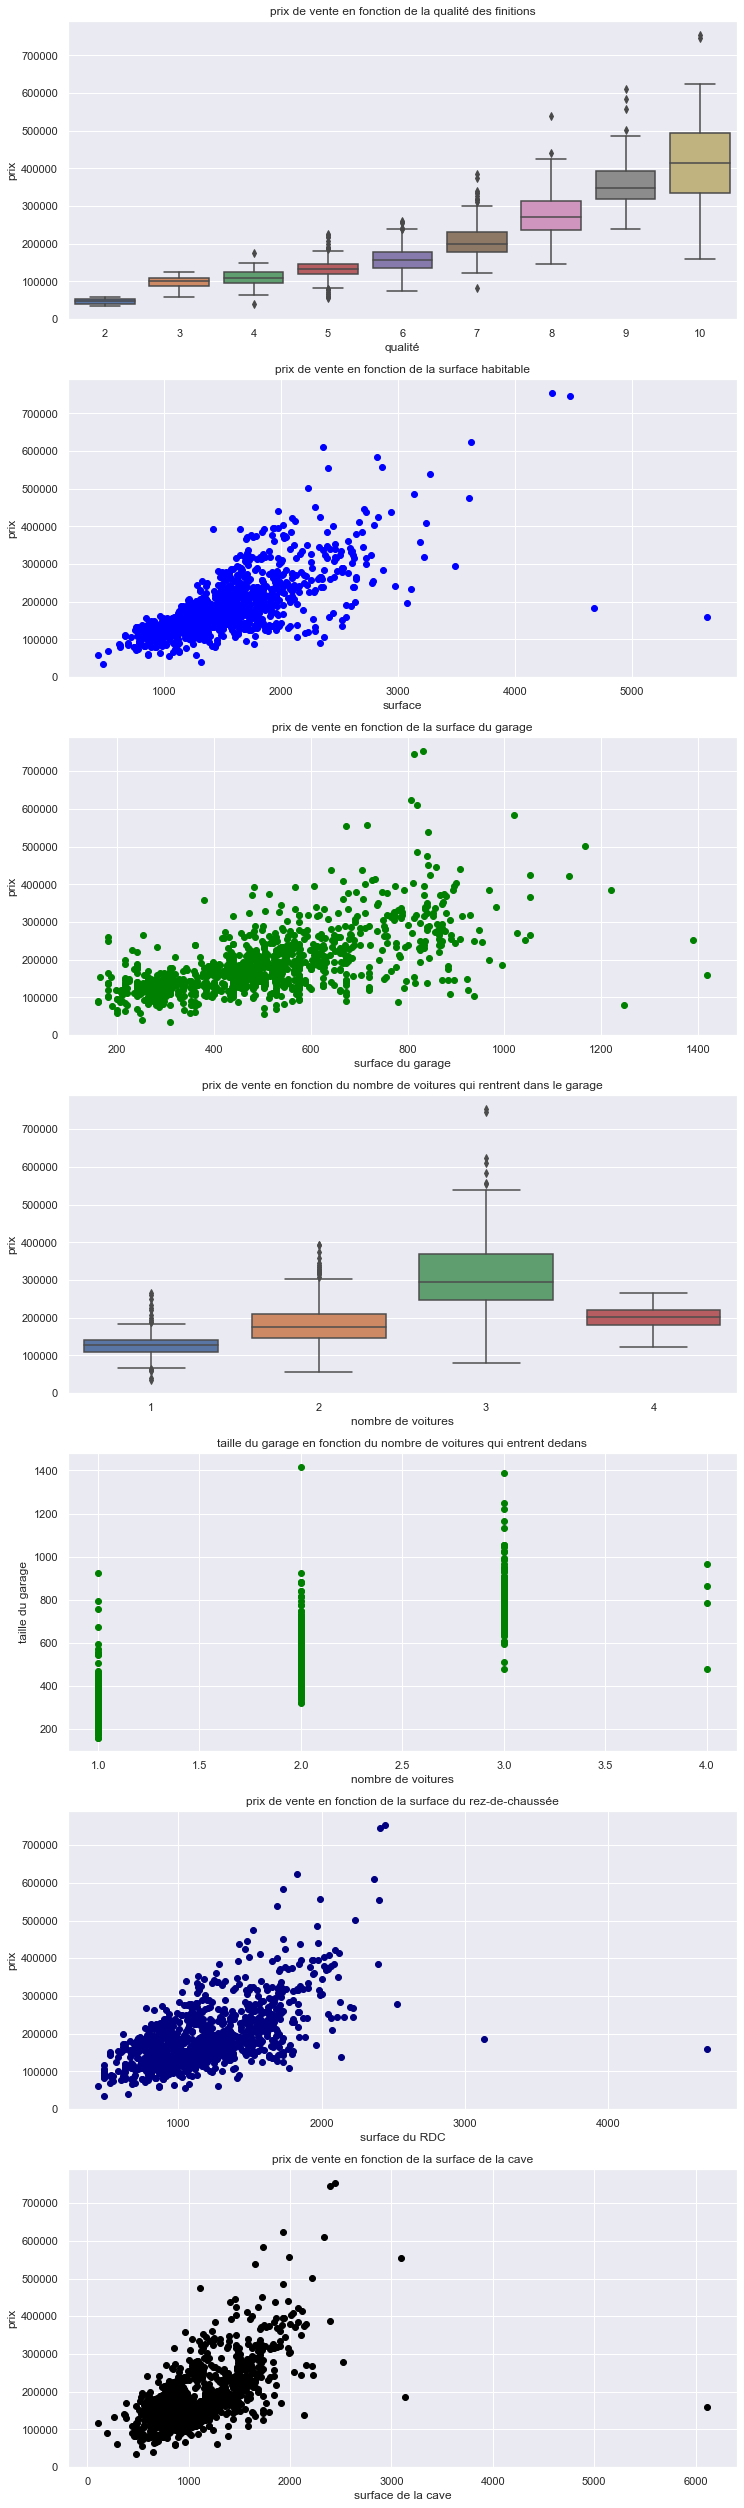

In [14]:
# à l'inverse, dans le heatmap, j'ai pu voir que saleprice est corrélé (> 0.60) avec :
# OverallQual / GrLivArea / GarageArea / GarageCars / 1stFlrSF / TotalBsmtSF
# je souhaite afficher des graphes de ces corrélations

#sns.boxplot(x = df_train["OverallQual"], y = df_train["SalePrice"])
f = plt.figure(figsize = (12,45))

ax1 = f.add_subplot(7,1,1)
ax1 = sns.boxplot(x = df_train["OverallQual"], y = df_train["SalePrice"], ax = ax1)
ax1.set_title("prix de vente en fonction de la qualité des finitions")
ax1.set_xlabel("qualité")
ax1.set_ylabel("prix")

ax2 = f.add_subplot(7,1,2)
ax2.scatter(df_train["GrLivArea"], df_train["SalePrice"], color = "blue")
ax2.set_title("prix de vente en fonction de la surface habitable")
ax2.set_xlabel("surface")
ax2.set_ylabel("prix")

ax3 = f.add_subplot(7,1,3)
ax3.scatter(df_train["GarageArea"], df_train["SalePrice"], color = "green")
ax3.set_title("prix de vente en fonction de la surface du garage")
ax3.set_xlabel("surface du garage")
ax3.set_ylabel("prix")

ax4 = f.add_subplot(7,1,4)
ax4 = sns.boxplot(x = df_train["GarageCars"], y = df_train["SalePrice"], ax = ax4)
ax4.set_title("prix de vente en fonction du nombre de voitures qui rentrent dans le garage")
ax4.set_xlabel("nombre de voitures")
ax4.set_ylabel("prix")

ax5 = f.add_subplot(7,1,5)
ax5.scatter(df_train["GarageCars"], df_train["GarageArea"], color = "green")
ax5.set_title("taille du garage en fonction du nombre de voitures qui entrent dedans")
ax5.set_xlabel("nombre de voitures")
ax5.set_ylabel("taille du garage")

ax6 = f.add_subplot(7,1,6)
ax6.scatter(df_train["1stFlrSF"], df_train["SalePrice"], color = "navy")
ax6.set_title("prix de vente en fonction de la surface du rez-de-chaussée")
ax6.set_xlabel("surface du RDC")
ax6.set_ylabel("prix")

ax7 = f.add_subplot(7,1,7)
ax7.scatter(df_train["TotalBsmtSF"], df_train["SalePrice"], color = "black")
ax7.set_title("prix de vente en fonction de la surface de la cave")
ax7.set_xlabel("surface de la cave")
ax7.set_ylabel("prix")

In [15]:
# de façon générale, plus la surface est grande (habitable/garage/cave) et plus le prix est important
# il semblerait que le prix augmente d'autant plus vite si la qualité des finitions est au maximum (10)
# et il est au maximum quand le garage peut contenir 3 voitures

In [16]:
# pour certains des modèles que je vais entraîner, je vais avoir besoin de mettre toutes les variables en numérique
var_num_train = df_train.select_dtypes(include = ["int", "float"])

var_cat_train = df_train.select_dtypes(include = ["object"])
var_cat_train = pd.get_dummies(var_cat_train)
var_cat_train = var_cat_train.astype("int")

# on recréé notre df_train avec uniquement des variables quantitatives
df_train2 = pd.DataFrame(pd.concat([var_num_train, var_cat_train], axis = 1))

In [17]:
df_train2.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [18]:
# idem pour df_test
var_num_test = df_test.select_dtypes(include = ["int", "float"])

var_cat_test = df_test.select_dtypes(include = ["object"])
var_cat_test = pd.get_dummies(var_cat_test)
var_cat_test = var_cat_test.astype("int")

df_test2 = pd.DataFrame(pd.concat([var_num_test, var_cat_test], axis = 1))

In [19]:
df_test2.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,0,0,0,1,0,0,0,0,1,0
1462,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,0,0,0,1,0,0,0,0,1,0
1463,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,0,0,0,1,0,0,0,0,1,0
1464,78.0,9978,6,1998,1998,20.0,602.0,324.0,926.0,926,...,0,0,0,1,0,0,0,0,1,0
1465,43.0,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,1280,...,0,0,0,1,0,0,0,0,1,0


In [20]:
# après avoir changé en variables catégorielles, je me retrouve avec 250 colonnes pour train
# et seulement 235 colonnes pour test (au lieu de 249)
# suppression des colonnes en trop (après avoir lancé le scaler qui renvoie une erreur, je peux voir lesquelles sont à supprimer)

df_train2 = df_train2.drop(["Condition2_RRNn", "Electrical_Mix", "Exterior1st_CBlock", "Exterior1st_ImStucc", 
"Exterior1st_Stone","Exterior2nd_AsphShn", "Exterior2nd_CBlock", "Exterior2nd_Other", "Exterior2nd_Stone", "GarageQual_Ex",
"Heating_Grav", "Heating_OthW", "HouseStyle_2.5Fin", "RoofMatl_ClyTile", "RoofMatl_Membran", "RoofMatl_Roll"], axis = 1)

df_test2 = df_test2.drop(["ExterCond_Po", "RoofStyle_Shed"], axis = 1)

In [21]:
# je sépare jeu d'entraînement et jeu de test

X_train = df_train2.drop("SalePrice", axis = 1)
y_train = df_train2["SalePrice"]
X_test = df_test2


In [22]:
# je commence par normaliser X_train et X_test
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [23]:
# j'aimerais voir si Lasso ou Ridge donnent de bons résultats (évitent souvent mieux le surapprentissage)

from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

# Lasso

alphas = [0.001,0.01,0.1,1,10,100]
lassocv = LassoCV(alphas = alphas)
lassocv.fit(X_train_scaled, y_train)
print("meilleur alpha lassocv :", lassocv.alpha_) 
print("score train de lassocv :", lassocv.score(X_train_scaled, y_train))

# Ridge

ridgecv = RidgeCV(alphas = (0.001,0.01,0.1,1,10,100))
ridgecv.fit(X_train_scaled, y_train)
print("meilleur alpha ridgecv :", ridgecv.alpha_)
print("score train de ridge :", ridgecv.score(X_train_scaled, y_train))


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16348831960.751709, tolerance: 619612297.9603698
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98619268247.54181, tolerance: 619612297.9603698
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190647851962.29578, tolerance: 619612297.9603698
  model = cd_fast.enet_coordinate_descent_gram(
c:\Us

meilleur alpha lassocv : 100.0
score train de lassocv : 0.8915415900082981
meilleur alpha ridgecv : 10.0
score train de ridge : 0.8818139310254938


In [24]:
# nous obtenons de bons scores

# meilleur alpha lassocv : 100.0
# score train de lassocv : 0.89
# meilleur alpha ridgecv : 10.0
# score train de ridge : 0.88

# je fais un lasso et un ridge avec ces alphas et je les évalue
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha = 100)
lasso.fit(X_train_scaled, y_train)
lasso_pred_train = lasso.predict(X_train_scaled)
print("RMSE train Lasso :", np.sqrt(mean_squared_error(y_train, lasso_pred_train)))


# Ridge

ridge = Ridge(alpha = 10)
ridge.fit(X_train_scaled, y_train)
ridge_pred_train = ridge.predict(X_train_scaled)
print("RMSE train ridge :", np.sqrt(mean_squared_error(y_train, ridge_pred_train)))

RMSE train Lasso : 27376.33855531802
RMSE train ridge : 28577.67482119645


In [25]:
# la racine carrée de l'erreur quadratique est légèrement plus élevée pour ridge que pour Lasso = erreur plus importante pour Ridge
# RMSE train Lasso : 27376.33
# RMSE train ridge : 28577.67

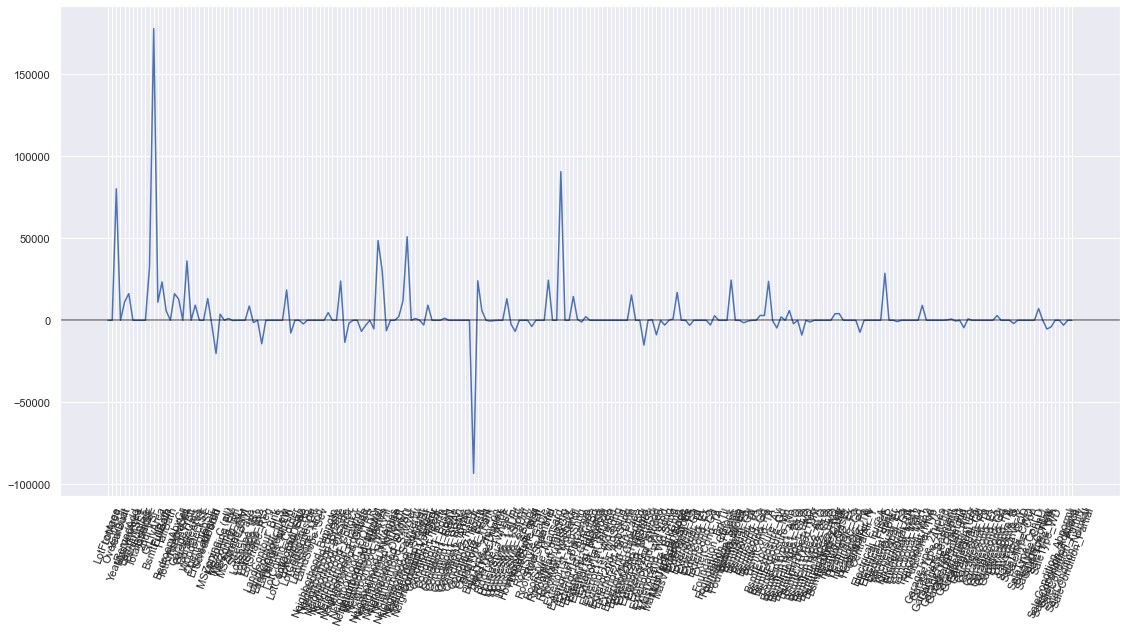

deleted variables : 99
importance des variables : 
 GrLivArea               177840.973378
RoofMatl_WdShngl         90637.373837
OverallQual              80163.049162
Neighborhood_StoneBr     50909.568769
Neighborhood_NoRidge     48561.917344
Condition2_PosN         -93386.043796
MSZoning_C (all)        -20246.665395
Exterior2nd_Stucco      -15137.140671
LandContour_Bnk         -14342.152687
Neighborhood_Edwards    -13455.219872
dtype: float64


In [26]:
# par curiosité, j'affiche les coefficients renvoyés par Lasso pour chaque colonne
plt.figure(figsize = (19,9))
plt.plot(range(len(X_train.columns)), lasso.coef_)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 70)
plt.axhline(y=0, color = "black", alpha = 0.5)
plt.show()

deleted_variables = lasso.coef_ != 0
print("deleted variables :", deleted_variables.sum())

lasso_coef = pd.Series(lasso.coef_, index = X_train.columns)
lasso_coef_importance = pd.concat([lasso_coef.sort_values(ascending = False).head(5), lasso_coef.sort_values().head(5)])

print("importance des variables : \n", lasso_coef_importance)


In [27]:
# il y a donc 99 variables que Lasso n'a pas pris en compte dans son calcul (variables sans importance)

# et les variables les plus importantes sont dans l'ordre : GrLivArea, RoofMatl_WdShngl, OverallQual, Neighborhood_StoneBr, Neighborhood_NoRidge
# pour GrLivArea et OverallQual, cela correspond avec la dataviz' (soit surface de l'habitation et qualité des finitions)
# pour le reste, il s'agit des plafonds faits en bardeaux de bois
# et de la localisation dans deux quartiers résidentiels de la ville (Stone Brook et Northridge)

In [28]:
# par curiosité, je tente quand même une regression logistique et un random forest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def find_best_params(model, params):
    grid_model = GridSearchCV(estimator = model, param_grid = params)
    grid_model.fit(X_train_scaled, y_train)
    return print("best parameters for {Model} :".format(Model = model), grid_model.best_params_)


In [29]:
# recherche des meilleurs hyperparamètres
# logistic regression
find_best_params(model = LogisticRegression(max_iter = 1000),
                params = {"C":[1, 10, 100], "solver":["liblinear","lbfgs"]})

# random forest
find_best_params(model = RandomForestClassifier(random_state = 123),
                params = {"criterion":["entropy", "gini"]})

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best parameters for LogisticRegression(max_iter=1000) : {'C': 1, 'solver': 'liblinear'}


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best parameters for RandomForestClassifier(random_state=123) : {'criterion': 'entropy'}


In [30]:
logreg = LogisticRegression(max_iter = 1000, C = 1, solver = "liblinear")
logreg.fit(X_train_scaled, y_train)
train_pred_logreg = logreg.predict(X_train_scaled)
print("score train logreg :", logreg.score(X_train_scaled, y_train))
print("RMSE train logreg :", np.sqrt(mean_squared_error(y_train, train_pred_logreg)))

score train logreg : 0.9122486288848263
RMSE train logreg : 8192.847770661667


In [31]:
# essai de random forest
rf = RandomForestClassifier(criterion = "entropy", random_state = 123)
rf.fit(X_train_scaled, y_train)
train_pred_rf = rf.predict(X_train_scaled)
print("score train rf :", rf.score(X_train_scaled, y_train))
print("RMSE train rf :", np.sqrt(mean_squared_error(y_train, train_pred_rf)))

score train rf : 1.0
RMSE train rf : 0.0


In [32]:
# les deux accuracy sont bonnes (logreg et rf, tout comme ridge et lasso)
# concernant les RMSE, nous avons donc :
# RMSE train Lasso : 27376.33
# RMSE train ridge : 28577.67
# RMSE train logreg : 8192.84
# RMSE train rf : 0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

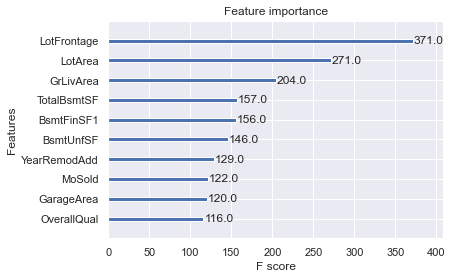

In [33]:
# et enfin, j'essaie un XGBoost

import xgboost as xgb

# création des matrices
train_xgb = xgb.DMatrix(X_train, y_train)
test_xgb = xgb.DMatrix(X_test)

# entraînement
parameters = {"booster" : "gbtree",
    "learning_rate" : 0.1,
    "objective" : "reg:squarederror",
    "eval_metric" : "merror"}

xgb1 = xgb.train(params = parameters, dtrain = train_xgb, num_boost_round = 100)

# graphique : importance des variables
xgb.plot_importance(xgb1, max_num_features = 10)


In [34]:
# cross validation avec xgboost
X_train_xgb2 = df_train2.drop(["SalePrice"], axis = 1)
y_train_xgb2 = df_train2["SalePrice"]
X_test_xgb2 = df_test2

sc3 = MinMaxScaler()
X_train_xgb2 = sc3.fit_transform(X_train_xgb2)
X_test_xgb2 = sc3.transform(X_test_xgb2)

# création des matrices
train_xgb2 = xgb.DMatrix(X_train_xgb2, y_train_xgb2)
test_xgb2 = xgb.DMatrix(X_test_xgb2)

# entraînement
parameters2 = {"booster" : "gbtree",
    "learning_rate" : 0.1,
    "objective" : "reg:squarederror",
    "eval_metric" : "merror"}

xgb2_cv = xgb.cv(params = parameters2, dtrain = train_xgb, num_boost_round = 100, early_stopping_rounds=10, 
    metrics="rmse", as_pandas=True, seed = 123)

# affichage résultats
print(xgb2_cv)

mae_moy = xgb2_cv['test-rmse-mean'].min()
boost_rounds = xgb2_cv['test-rmse-mean'].idxmin()
print("root mean squared error {} for {} boost rounds.".format(mae_moy, boost_rounds))


    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     185336.552083     1927.916386   185546.562500    4267.465221
1     167918.916667     1726.646619   168237.203125    4020.062477
2     152254.828125     1548.781215   153215.750000    3633.485027
3     138115.656250     1362.943914   139380.562500    3426.012928
4     125361.489584     1219.237660   127125.023438    3060.123899
..              ...             ...             ...            ...
95      4475.196208      299.379976    32693.953776    2752.500885
96      4429.184163      290.519554    32687.593099    2748.199612
97      4376.410482      291.013771    32685.938151    2747.235459
98      4318.108724      276.263563    32682.009114    2740.689400
99      4271.627686      277.362923    32677.536459    2742.974254

[100 rows x 4 columns]
root mean squared error 32672.64713566667 for 91 boost rounds.


In [35]:
# je retiens le modèle : random forest
test_pred_rf = rf.predict(X_test_scaled)
df_test["SalePrice"] = test_pred_rf
display(df_test.head())

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,Y,140,0,0,120,6,WD,Normal,115000
1462,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,TA,Y,393,36,0,0,6,WD,Normal,150000
1463,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,Y,212,34,0,0,3,WD,Normal,192000
1464,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,Y,360,36,0,0,6,WD,Normal,181000
1465,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,TA,Y,0,82,0,144,1,WD,Normal,153900


In [36]:
# j'affiche les variables qui étaient les plus déterminantes dans la prise de décision du modèle
feature_importances = pd.DataFrame(rf.feature_importances_,
                                    index =X_train.columns,  
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                       importance
GrLivArea                0.045937
TotalBsmtSF              0.038374
1stFlrSF                 0.038255
YearBuilt                0.038107
GarageArea               0.036860
...                           ...
HeatingQC_Po             0.000008
Exterior1st_BrkComm      0.000008
SaleCondition_AdjLand    0.000002
Condition2_PosA          0.000000
Utilities_AllPub         0.000000

[233 rows x 1 columns]
